# OpenML in Python 
OpenML is an online collaboration platform for machine learning: 

* Find or share interesting, well-documented datasets
* Define research / modelling goals (tasks)
* Explore large amounts of machine learning algorithms, with APIs in Java, R, Python
* Log and share reproducible experiments, models, results 
* Works seamlessly with scikit-learn and other libraries
* Large scale benchmarking, compare to state of the art

## Authentication

* Create an OpenML account (free) on http://www.openml.org. 
* After logging in, open your account page (avatar on the top right)
* Open 'Account Settings', then 'API authentication' to find your API key.

There are two ways to authenticate:  

* Create a plain text file `~/.openml/config` with the line 'apikey=MYKEY', replacing MYKEY with your API key.
* Run the code below, replacing 'YOURKEY' with your API key.

In [17]:
# Uncomment and set your OpenML key. Don't share your key with others.
%matplotlib inline
import openml as oml
#oml.config.apikey = 'YOURKEY'

# It all starts with data
Explore thousands of datasets, or share your own

### List datasets

``` python
import openml as oml
openml_list = oml.datasets.list_datasets()
```

In [2]:
import openml as oml
openml_list = oml.datasets.list_datasets() # Returns a dict

# Show a nice table with some key data properties
import pandas as pd
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
datalist = datalist[[
    'did','name','NumberOfInstances',
    'NumberOfFeatures','NumberOfClasses'
]]
print("First 10 of %s datasets..." % len(datalist))
datalist.head(n=10)

First 10 of 2550 datasets...


,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
2,2,anneal,898.0,39.0,5.0
3,3,kr-vs-kp,3196.0,37.0,2.0
4,4,labor,57.0,17.0,2.0
5,5,arrhythmia,452.0,280.0,13.0
6,6,letter,20000.0,17.0,26.0
7,7,audiology,226.0,70.0,24.0
8,8,liver-disorders,345.0,7.0,0.0
9,9,autos,205.0,26.0,6.0
10,10,lymph,148.0,19.0,4.0
11,11,balance-scale,625.0,5.0,3.0


#### Filter datasets

``` python
openml_list = oml.datasets.list_datasets(
    number_instances = '10000..20000', 
    number_features = '10..20')
```

In [3]:
openml_list = oml.datasets.list_datasets(number_instances = '10000..20000', number_features = '10..20') # Returns a dict
# Show a nice table with some key data properties
import pandas as pd
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
datalist = datalist[[
    'did','name','NumberOfInstances',
    'NumberOfFeatures','NumberOfClasses'
]]
print("Found 11 datasets")
datalist.head(n=11)

Found 11 datasets


,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
6,6,letter,20000,17,26
32,32,pendigits,10992,17,10
216,216,elevators,16599,19,0
846,846,elevators,16599,19,2
977,977,letter,20000,17,2
1019,1019,pendigits,10992,17,2
1120,1120,MagicTelescope,19020,12,2
1199,1199,BNG(echoMonths),17496,10,0
1222,1222,letter-challenge-unlabeled.arff,20000,17,3
1414,1414,Kaggle_bike_sharing_demand_challange,10886,12,0


#### Search datasets by name

``` python
openml_list = oml.datasets.list_datasets(
    data_name = 'eeg-eye-state')
```

In [4]:
openml_list = oml.datasets.list_datasets(data_name = 'eeg-eye-state') # Returns a dict
# Show a nice table with some key data properties
import pandas as pd
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
datalist = datalist[[
    'did','name','NumberOfInstances',
    'NumberOfFeatures','NumberOfClasses'
]]
#print("Found 11 datasets")
datalist.head(n=11)

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1471,1471,eeg-eye-state,14980,15,2


## Download datasets
This is done based on the dataset ID ('did').

``` python
dataset = oml.datasets.get_dataset(1471)
```

In [5]:
dataset = oml.datasets.get_dataset(1471)

# Print a summary
print("This is dataset '%s', the target feature is '%s'" % 
      (dataset.name, dataset.default_target_attribute))
print("URL: %s" % dataset.url)
print(dataset.description[:500])

This is dataset 'eeg-eye-state', the target feature is 'Class'
URL: https://www.openml.org/data/v1/download/1587924/eeg-eye-state.arff
**Author**: Oliver Roesler  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after


#### Get the actual data.  
``` python
X, y, attribute_names = dataset.get_data(
    return_attribute_names=True)
eeg = pd.DataFrame(X, columns=attribute_names)
```

In [6]:
X, y, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute,
    return_attribute_names=True,
)
eeg = pd.DataFrame(X, columns=attribute_names)
eeg['class'] = y
print(eeg[:10])

            V1           V2           V3           V4           V5  \
0  4329.229980  4009.229980  4289.229980  4148.209961  4350.259766   
1  4324.620117  4004.620117  4293.850098  4148.720215  4342.049805   
2  4327.689941  4006.669922  4295.379883  4156.410156  4336.919922   
3  4328.720215  4011.790039  4296.410156  4155.899902  4343.589844   
4  4326.149902  4011.790039  4292.310059  4151.279785  4347.689941   
5  4321.029785  4004.620117  4284.100098  4153.330078  4345.640137   
6  4319.490234  4001.030029  4280.509766  4151.790039  4343.589844   
7  4325.640137  4006.669922  4278.459961  4143.080078  4344.100098   
8  4326.149902  4010.770020  4276.410156  4139.490234  4345.129883   
9  4326.149902  4011.280029  4276.919922  4142.049805  4344.100098   

            V6           V7           V8           V9          V10  \
0  4586.149902  4096.919922  4641.029785  4222.049805  4238.459961   
1  4586.669922  4097.439941  4638.970215  4210.770020  4226.669922   
2  4583.589844  409

#### Visualize data
``` python
eeg.plot()
```

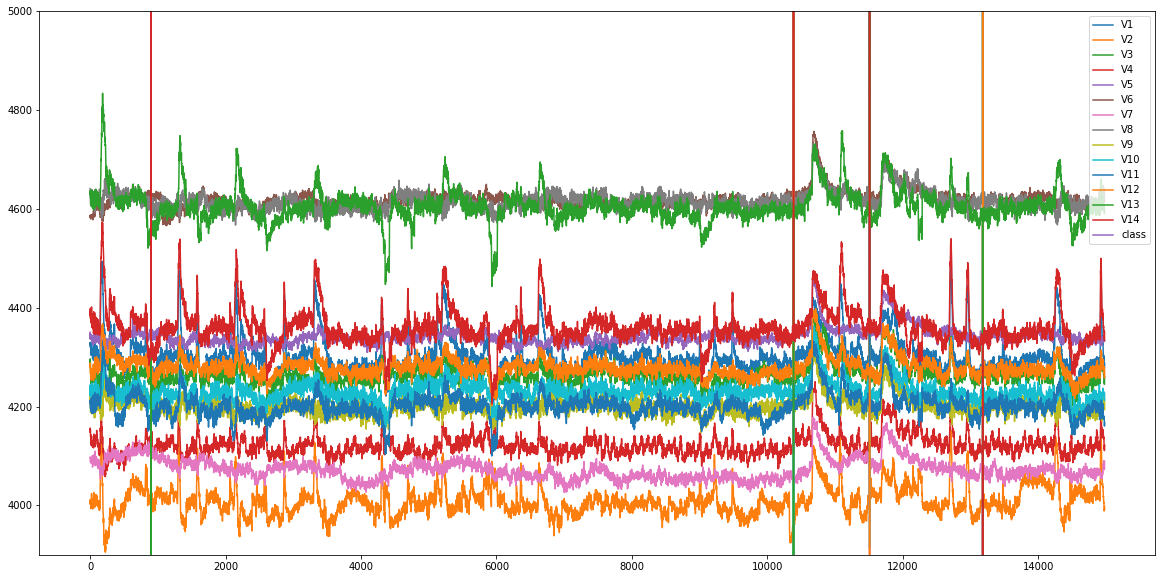

In [21]:
eeg.plot(figsize=(20,10), ylim=(3900,5000));

#### Over 100 data qualities
Statistical and other properties of each dataset
``` python
dataset.qualities
```

In [25]:
dataset.qualities

{'AutoCorrelation': 0.5034013605442177,
 'CfsSubsetEval_DecisionStumpAUC': 0.7924545850419331,
 'CfsSubsetEval_DecisionStumpErrRate': 0.23648648648648649,
 'CfsSubsetEval_DecisionStumpKappa': 0.5474401537655076,
 'CfsSubsetEval_NaiveBayesAUC': 0.7924545850419331,
 'CfsSubsetEval_NaiveBayesErrRate': 0.23648648648648649,
 'CfsSubsetEval_NaiveBayesKappa': 0.5474401537655076,
 'CfsSubsetEval_kNN1NAUC': 0.7924545850419331,
 'CfsSubsetEval_kNN1NErrRate': 0.23648648648648649,
 'CfsSubsetEval_kNN1NKappa': 0.5474401537655076,
 'ClassEntropy': 1.2276775019465804,
 'DecisionStumpAUC': 0.7715656536027917,
 'DecisionStumpErrRate': 0.24324324324324326,
 'DecisionStumpKappa': 0.5316455696202532,
 'Dimensionality': 0.12837837837837837,
 'EquivalentNumberOfAtts': 9.37680223405617,
 'J48.00001.AUC': 0.8035040133716935,
 'J48.00001.ErrRate': 0.24324324324324326,
 'J48.00001.Kappa': 0.55,
 'J48.0001.AUC': 0.8035040133716935,
 'J48.0001.ErrRate': 0.24324324324324326,
 'J48.0001.Kappa': 0.55,
 'J48.001.AUC'

## Train machine learning models
``` python
from sklearn import neighbors
dataset = oml.datasets.get_dataset(1471)
X, y = dataset.get_data(target=dataset.default_target_attribute)
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
```

In [8]:
from sklearn import neighbors

dataset = oml.datasets.get_dataset(1471)
X, y = dataset.get_data(target=dataset.default_target_attribute)
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Import directly via scikit-learn
``` python
from sklearn.datasets import fetch_openml
mice_data = fetch_openml(name='miceprotein', 
                  version=4)
mice_data.details
```

In [28]:
from sklearn.datasets import fetch_openml
mice_data = fetch_openml(name='miceprotein', 
                  version=4)
mice_data.details

{'default_target_attribute': 'class',
 'file_id': '17928620',
 'format': 'ARFF',
 'id': '40966',
 'ignore_attribute': ['Genotype', 'Treatment', 'Behavior'],
 'licence': 'Public',
 'md5_checksum': '3c479a6885bfa0438971388283a1ce32',
 'name': 'MiceProtein',
 'processing_date': '2018-10-04 00:49:58',
 'row_id_attribute': 'MouseID',
 'status': 'active',
 'tag': ['OpenML-CC18', 'study_135', 'study_98', 'study_99'],
 'upload_date': '2017-11-08T16:00:15',
 'url': 'https://www.openml.org/data/v1/download/17928620/MiceProtein.arff',
 'version': '4',
 'visibility': 'public'}

You can also ask for meta-data to automatically preprocess the data
- e.g. categorical features -> do feature encoding

``` python
dataset = oml.datasets.get_dataset(10)
X, y, categorical = dataset.get_data(
    return_categorical_indicator=True)
enc = preprocessing.OneHotEncoder(
    categorical_features=categorical)
X = enc.fit_transform(X)
clf.fit(X, y)
```

In [29]:
from sklearn import preprocessing
dataset = oml.datasets.get_dataset(10)
X, y, categorical = dataset.get_data(
    target=dataset.default_target_attribute,
    return_categorical_indicator=True,
)
print("Categorical features: %s" % categorical)
enc = preprocessing.OneHotEncoder(categorical_features=categorical)
X = enc.fit_transform(X)
clf.fit(X, y)

Categorical features: [True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False]


/Users/joa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=64338,
          splitter='random')

## Listing tasks
* Tasks define how models should be evaluated
* Specific target, train-test splits, ...
``` python
task_list = oml.tasks.list_tasks(size=5000) 
```

In [10]:
task_list = oml.tasks.list_tasks(size=5000) # Get first 5000 tasks

mytasks = pd.DataFrame.from_dict(task_list, orient='index')
mytasks = mytasks[['tid','did','name','task_type','estimation_procedure','evaluation_measures']]
print("First 5 of %s tasks:" % len(mytasks))
mytasks.head()

First 5 of 5000 tasks:


,tid,did,name,task_type,estimation_procedure,evaluation_measures
2,2,2,anneal,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
3,3,3,kr-vs-kp,Supervised Classification,10-fold Crossvalidation,NaN
4,4,4,labor,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
5,5,5,arrhythmia,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
6,6,6,letter,Supervised Classification,10-fold Crossvalidation,NaN


Listing/filtering same as datasets
``` python
mytasks.query('name=="eeg-eye-state"')
```

In [11]:
mytasks.query('name=="eeg-eye-state"')

,tid,did,name,task_type,estimation_procedure,evaluation_measures
9983,9983,1471,eeg-eye-state,Supervised Classification,10-fold Crossvalidation,NaN
14951,14951,1471,eeg-eye-state,Supervised Classification,10-fold Crossvalidation,NaN


## Download tasks
``` python
task = oml.tasks.get_task(14951)
```

In [12]:
from pprint import pprint
task = oml.tasks.get_task(14951)
pprint(vars(task))

{'class_labels': ['1', '2'],
 'cost_matrix': None,
 'dataset_id': 1471,
 'estimation_parameters': {'number_folds': '10',
                           'number_repeats': '1',
                           'percentage': '',
                           'stratified_sampling': 'true'},
 'estimation_procedure': {'data_splits_url': 'https://www.openml.org/api_splits/get/14951/Task_14951_splits.arff',
                          'parameters': {'number_folds': '10',
                                         'number_repeats': '1',
                                         'percentage': '',
                                         'stratified_sampling': 'true'},
                          'type': 'crossvalidation'},
 'evaluation_measure': None,
 'split': None,
 'target_name': 'Class',
 'task_id': 14951,
 'task_type': 'Supervised Classification',
 'task_type_id': 1}


# Runs: Easily train models on tasks
``` python
# Get a task
task = oml.tasks.get_task(14951)

# Build any classifier or pipeline
clf = tree.ExtraTreeClassifier()

# Create a flow
flow = oml.flows.sklearn_to_flow(clf)

# Run the flow 
run = oml.runs.run_flow_on_task(task, flow)
```

In [13]:
from sklearn import ensemble, tree

# Get a task
task = oml.tasks.get_task(14951)

# Build any classifier or pipeline
clf = tree.ExtraTreeClassifier()

# Create a flow
flow = oml.flows.sklearn_to_flow(clf)

# Run the flow 
run = oml.runs.run_flow_on_task(task, flow)

Share the run on the OpenML server
``` python
run = run.publish()
```

In [14]:
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/10154294


### Train and share pipelines
``` python
from sklearn import pipeline, ensemble, preprocessing
from openml import tasks,runs, datasets
task = tasks.get_task(59)
pipe = pipeline.Pipeline(steps=[
            ('Imputer', preprocessing.Imputer()),
            ('OneHotEncoder', preprocessing.OneHotEncoder(),
            ('Classifier', ensemble.RandomForestClassifier())
           ])
flow = oml.flows.sklearn_to_flow(pipe)
run = oml.runs.run_flow_on_task(task, flow)
myrun = run.publish()
```

### Train and share Keras models
``` python
import keras
model = Sequential()
model.add(Conv2D(20, (5, 5), input_shape=(28,28,1), 
          activation='relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task = tasks.get_task(3573) #MNIST
flow = oml.flows.keras_to_flow(model)
run = oml.runs.run_flow_on_task(task, flow)
myrun = run.publish()
```

## Download previous results
You can download all your results anytime, as well as everybody else's  

``` python
myruns = oml.evaluations.list_evaluations(
    task=[14951],
    function='area_under_roc_curve')
sns.violinplot(x="score", y="flow", data=pd.DataFrame(scores), scale="width", palette="Set3", cut=0);
```

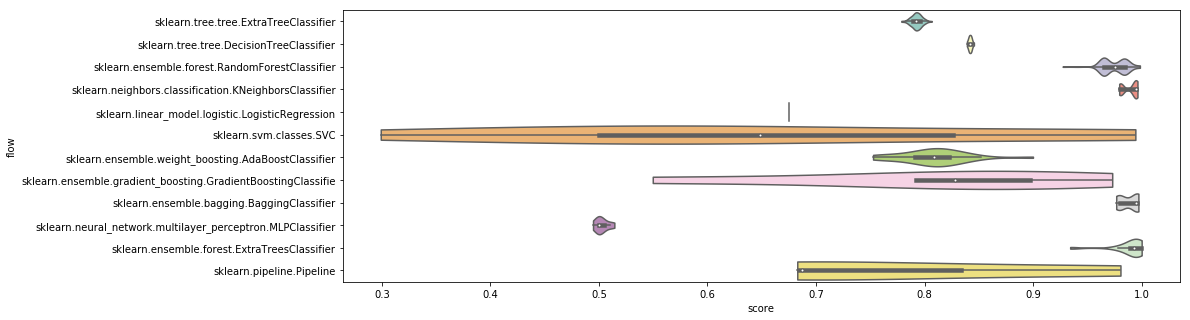

In [57]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

myruns = oml.evaluations.list_evaluations(
    task=[14951],
    function='area_under_roc_curve')

# Download the tasks and plot the scores
scores = []
for r in myruns.values():
    if r.flow_name[0:7] == 'sklearn':
        scores.append({"flow":r.flow_name.split('(')[0][0:60], "score":r.value})

plt.figure(figsize=(15,5))
sns.violinplot(x="score", y="flow", data=pd.DataFrame(scores), scale="width", palette="Set3", cut=0);